# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

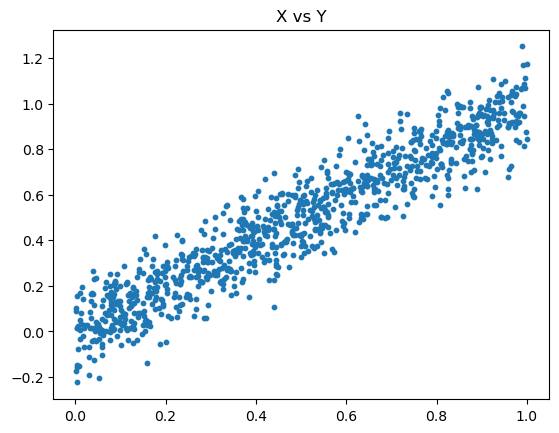

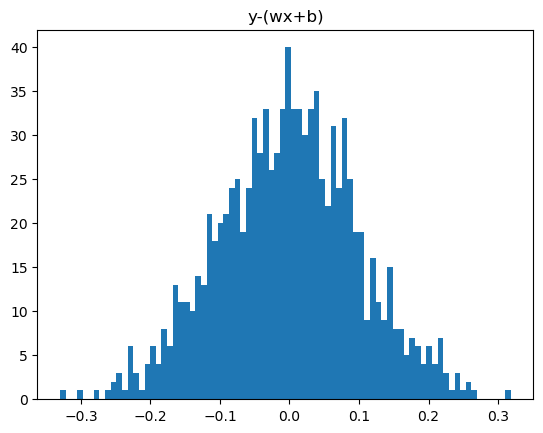

In [3]:
N = 1000
w = 1
b = 0

x = np.random.random(N)
y = np.random.normal(0, .1, N) + w*x+b

plt.scatter(x,y, s= 10)
plt.title('X vs Y')
plt.show()

z = y-(w*x+b)
plt.hist(z, bins = 80)
plt.title('y-(wx+b)')
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

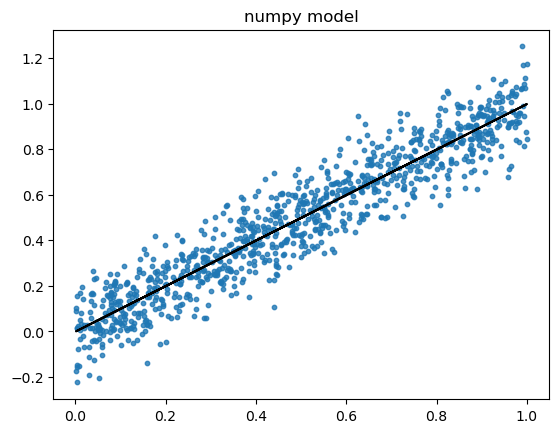

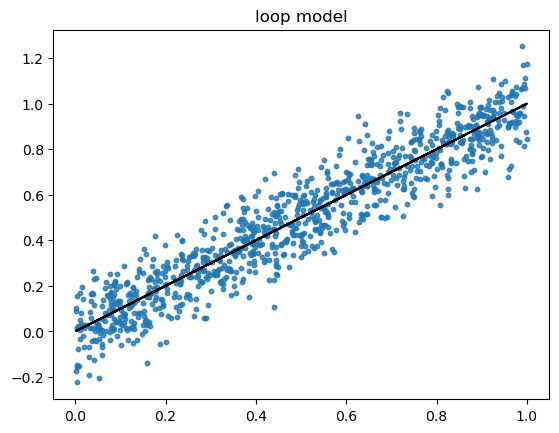

In [4]:
def model_loop(x,w,b):
    preds = []
    for i in range(len(x)):
        p = w*x[i]+b
        preds.append(p)
    
    plt.scatter(x, y, s=10, alpha = .8)
    plt.plot(x, preds, color = 'black')
    plt.title('loop model')
    return plt.show()


    

def model_np(x,w,b):
    w, b = np.polyfit(x, y, 1)
    plt.scatter(x, y, s=10, alpha = .8)
    plt.plot(x, w*x+b, color = 'black')
    plt.title('numpy model')
    return plt.show()

model_np(x,w,b)
model_loop(x,w,b)

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

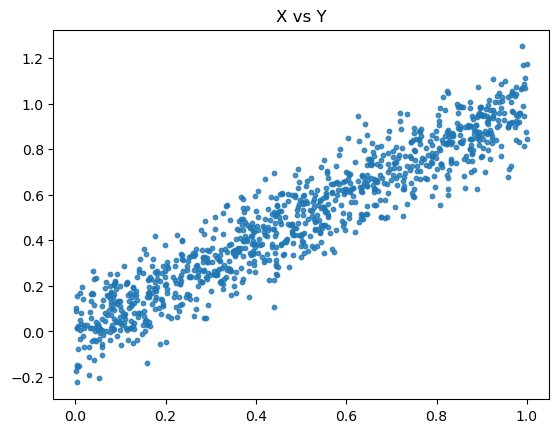

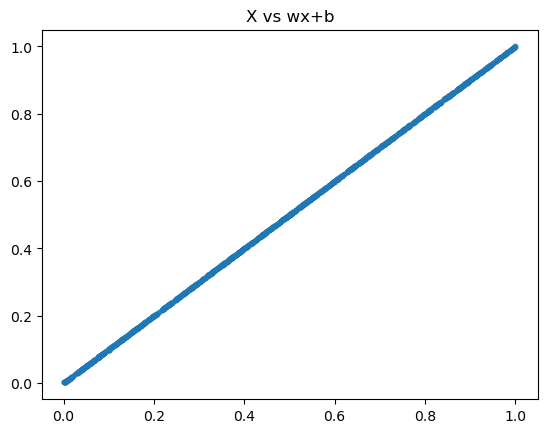

In [5]:
plt.scatter(x,y,s=10,alpha=.8)
plt.title('X vs Y')
plt.show()

plt.scatter(x, w*x+b, s=10, alpha = .8)
plt.title('X vs wx+b')
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


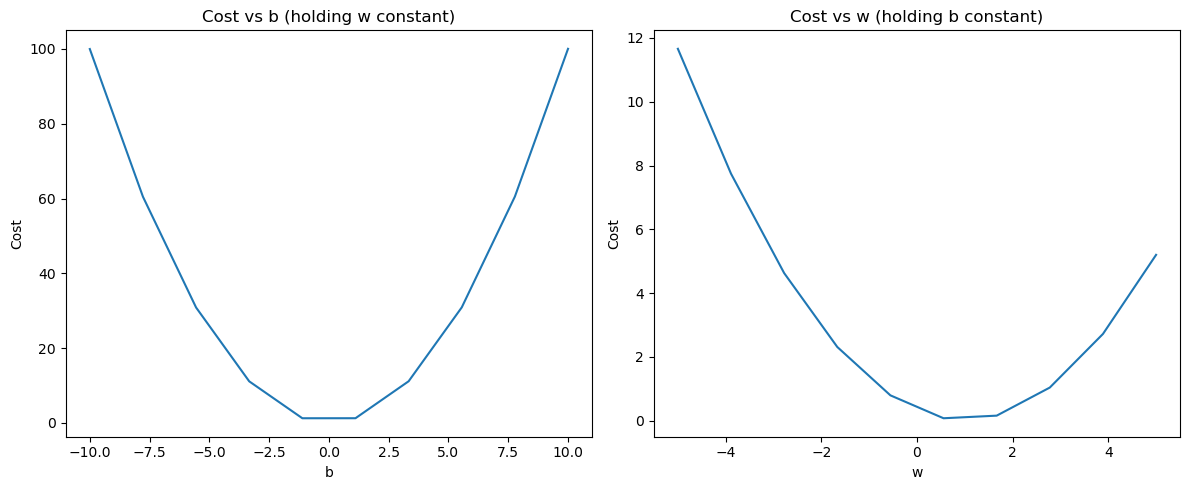

In [6]:
def model_loop(x,w,b):
    preds = []
    for i in range(len(x)):
        p = w*x[i]+b
        preds.append(p)
    
    return preds

def cost(x,y,w,b):
    predictions = w * x + b
    mse = np.mean((predictions - y) ** 2)
    return mse
    
b_values = np.linspace(-10, 10, 10)
w_values = np.linspace(-5, 5, 10)

costs_b = [cost(x, y, w, b) for b in b_values]
costs_w = [cost(x, y, w, b) for w in w_values]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(b_values, costs_b)
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs b (holding w constant)')

# Plot cost vs w
plt.subplot(1, 2, 2)
plt.plot(w_values, costs_w)
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs w (holding b constant)')

plt.tight_layout()

plt.show()



5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/

1000 1000 1000 1000


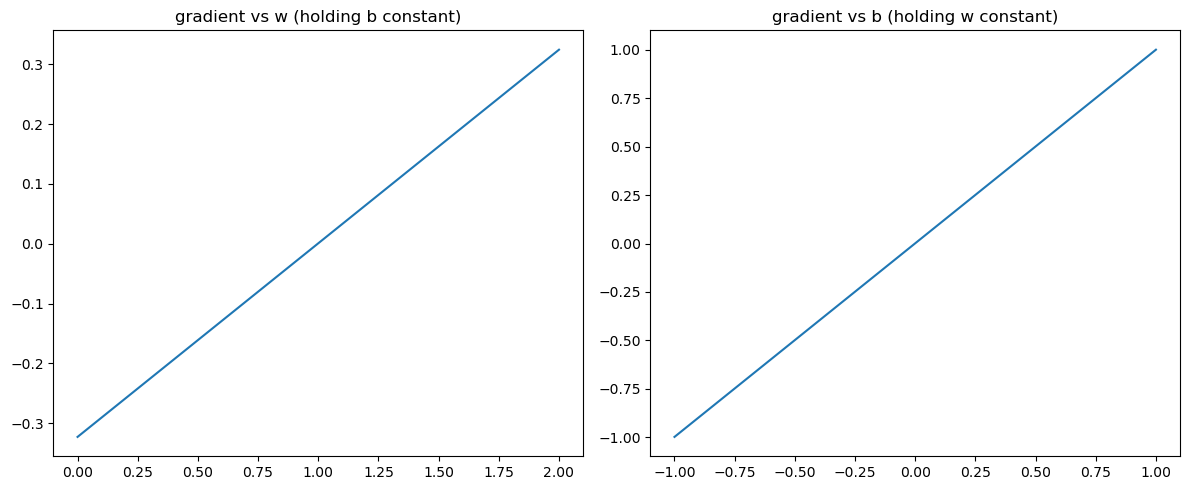

In [36]:
def gradient(x,y,w,b):
    m = len(y)
    dj_dw = (1/m) * np.sum((x * w + b - y) * x)
    dj_db = (1/m) * np.sum(x * w + b - y)
    return dj_dw, dj_db 

b_values = np.linspace(-1, 1, 1000)
w_values = np.linspace(0, 2, 1000)

gradients_w = [gradient(x, y, w_v, b)[0] for w_v in w_values] 
gradients_b = [gradient(x, y, w, b_v)[1] for b_v in b_values]

plt.figure(figsize = (12,5))

plt.subplot(1, 2, 1)
plt.plot(w_values, gradients_w)
plt.title('gradient vs w (holding b constant)')

plt.subplot(1, 2, 2)
plt.plot(b_values, gradients_b)
plt.title('gradient vs b (holding w constant)')

plt.tight_layout()

plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [38]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 2.23e-01  dj_dw: -3.231e-01, dj_db: -4.889e-01   w:  5.816e-02, b: 8.80047e-02
Iteration  200: Cost 1.05e-02  dj_dw: -4.712e-03, dj_db:  2.475e-03   w:  9.294e-01, b: 3.55626e-02
Iteration  400: Cost 1.00e-02  dj_dw: -4.271e-04, dj_db:  2.243e-04   w:  9.933e-01, b: 2.01886e-03
Iteration  600: Cost 1.00e-02  dj_dw: -3.872e-05, dj_db:  2.034e-05   w:  9.991e-01, b:-1.02212e-03
Iteration  800: Cost 1.00e-02  dj_dw: -3.511e-06, dj_db:  1.844e-06   w:  9.996e-01, b:-1.29780e-03
Iteration 1000: Cost 1.00e-02  dj_dw: -3.183e-07, dj_db:  1.672e-07   w:  9.997e-01, b:-1.32279e-03
Iteration 1200: Cost 1.00e-02  dj_dw: -2.885e-08, dj_db:  1.515e-08   w:  9.997e-01, b:-1.32506e-03
Iteration 1400: Cost 1.00e-02  dj_dw: -2.616e-09, dj_db:  1.374e-09   w:  9.997e-01, b:-1.32527e-03
Iteration 1600: Cost 1.00e-02  dj_dw: -2.371e-10, dj_db:  1.245e-10   w:  9.997e-01, b:-1.32528e-03
Iteration 1800: Cost 1.00e-02  dj_dw: -2.150e-11, dj_db:  1.129e-11   w:  9.997e-01, b:-1.32529e-03


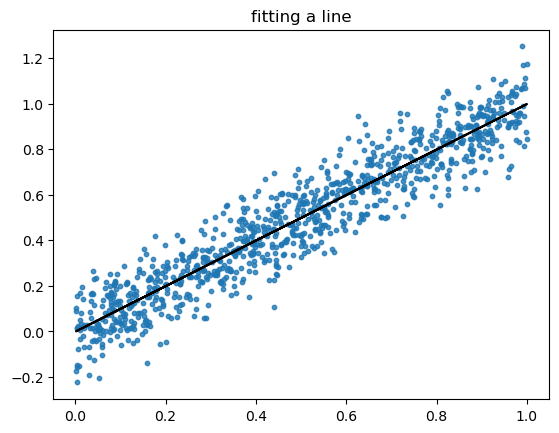

In [54]:
w_in = 0
b_in = 0
alpha = 0.18
num_iters = 2000

w_final, b_final, J_history, p_history = gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)

print('\n\nw:', w_final, 'b:', b_final)
plt.scatter(x, y, s=10, alpha = .8)
plt.plot(x, w_final*x+b_final, color = 'black')
plt.title('fitting a line')
plt.show()

7. Plot the cost and parameters versus iteration of gradient descent.

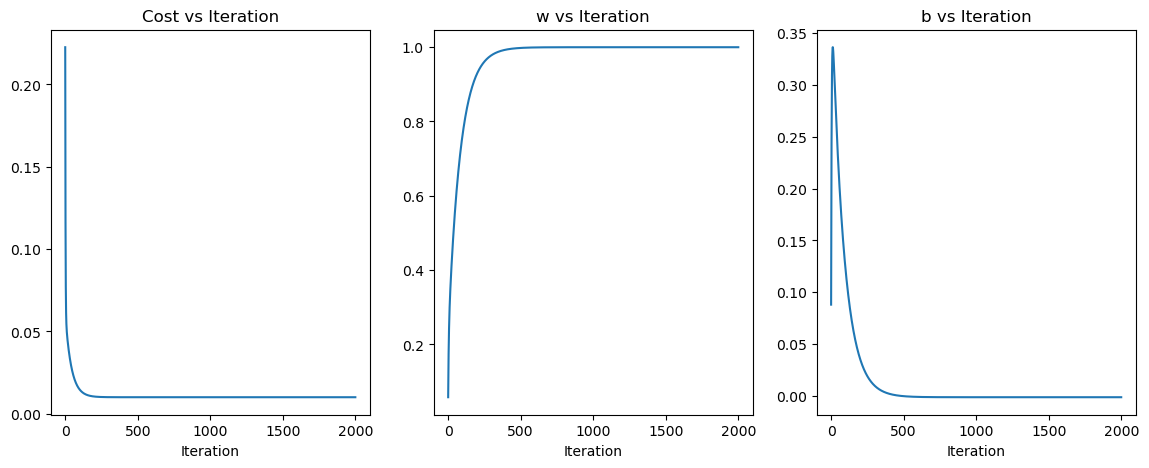

In [60]:
ws = [p[0] for p in p_history]
bs = [p[1] for p in p_history]

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(range(len(J_history)), J_history, label='Cost')
plt.xlabel('Iteration')
plt.title('Cost vs Iteration')


plt.subplot(1, 3, 2)
plt.plot(range(len(w_history)), ws, label='w')
plt.xlabel('Iteration')
plt.title('w vs Iteration')


plt.subplot(1, 3, 3)
plt.plot(range(len(bs)), bs, label='b')
plt.xlabel('Iteration')
plt.title('b vs Iteration')

plt.show()